In [1]:
# ---Set up---

# Import libraries
import torch
import numpy as np
import tabulate
from tabulate import tabulate
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image

In [2]:
# Creating a tensor
data_rand = np.random.rand(3,3)
print("\nSample Data: \n", data_rand)

# Tensor from a numpy array
t_np = torch.from_numpy(data_rand)
print("\nTorch tensor (from numpy array): \n", t_np)
print(f"\nShape of tensor: {t_np.shape}")
print(f"Datatype of tensor: {t_np.dtype}")
print(f"Tensor is stored on: {t_np.device}")


Sample Data: 
 [[0.49033264 0.56667166 0.99861644]
 [0.80027639 0.06241324 0.09169385]
 [0.12421823 0.91706451 0.80249655]]

Torch tensor (from numpy array): 
 tensor([[0.4903, 0.5667, 0.9986],
        [0.8003, 0.0624, 0.0917],
        [0.1242, 0.9171, 0.8025]], dtype=torch.float64)

Shape of tensor: torch.Size([3, 3])
Datatype of tensor: torch.float64
Tensor is stored on: cpu


In [3]:
# ---Tensor operations---
print("\nTorch tensor (from numpy array): \n", t_np)

# Dummy tensor
t_rand = torch.rand_like(t_np)
print("\nDummy tensor (same attributes as previous tensor): \n", t_rand)

# Indexing and slicing
print("\nFirst row of numpy tensor: \n", t_np[0,:])
print("\nFirst column of numpy tensor: \n", t_np[:, 0])
print("\nLast row of numpy tensor: \n", t_np[-1,:])
print("\nFirst row, second column value: \n", t_np[0,1])
t_np[1,1] = 0
print("\nChange the center value to 0: \n", t_np)

# Concatenating
t_conc = torch.cat([t_np, t_rand], dim=1)
print("\nConcatenated tensor: \n", t_conc)

# Arithmetic
print("\nt_np + t_rand = \n", t_np+t_rand)
print("\nt_np - t_rand = \n", t_np-t_rand)

# Multiplication
print("\nMatrix multiplication and elementwise multiplication can be done in the following ways: \n")
head = ["Mult. type", "Function"]
mult = [["Matrix", "tensor1 @ tensor2"],
        ["", "tensor1.matmul(tensor2)"],
        ["Elementwise", "tensor1 * tensor2"], 
        ["", "tensor1.mul(tensor2)"]]
print(tabulate(mult, headers=head, tablefmt="grid"))
print("\nMatrix mult: t_np @ t_rand = \n", t_np @ t_rand)
print("\nElementwise mult: t_np * t_rand = \n", t_np * t_rand)


Torch tensor (from numpy array): 
 tensor([[0.4903, 0.5667, 0.9986],
        [0.8003, 0.0624, 0.0917],
        [0.1242, 0.9171, 0.8025]], dtype=torch.float64)

Dummy tensor (same attributes as previous tensor): 
 tensor([[0.8091, 0.4582, 0.4003],
        [0.3253, 0.0765, 0.3060],
        [0.9723, 0.8125, 0.6098]], dtype=torch.float64)

First row of numpy tensor: 
 tensor([0.4903, 0.5667, 0.9986], dtype=torch.float64)

First column of numpy tensor: 
 tensor([0.4903, 0.8003, 0.1242], dtype=torch.float64)

Last row of numpy tensor: 
 tensor([0.1242, 0.9171, 0.8025], dtype=torch.float64)

First row, second column value: 
 tensor(0.5667, dtype=torch.float64)

Change the center value to 0: 
 tensor([[0.4903, 0.5667, 0.9986],
        [0.8003, 0.0000, 0.0917],
        [0.1242, 0.9171, 0.8025]], dtype=torch.float64)

Concatenated tensor: 
 tensor([[0.4903, 0.5667, 0.9986, 0.8091, 0.4582, 0.4003],
        [0.8003, 0.0000, 0.0917, 0.3253, 0.0765, 0.3060],
        [0.1242, 0.9171, 0.8025, 0.9723,

In [4]:
# ---Datasets---

# Loading a dataset

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

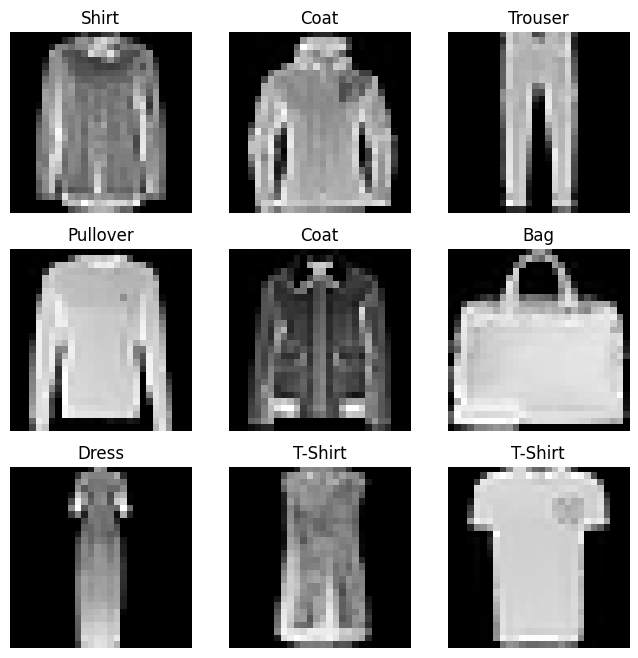

In [5]:
# Visualizing a dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
# Creating a dataset from files

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    # Initializes the directory, annotations file, and transofrms

    def __len__(self):
        return len(self.img_labels)
    # Returns number of samples

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    # Loads and returns sample at given index, idx; identiifes image's location on disk and converts to tensor, 
    # retrieves corresponding label, calls transform functions, returns tensor image and label

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


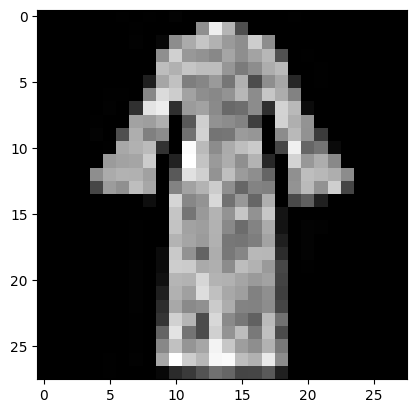

Label: 3


In [16]:
# Preparing data for training
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate through DataLoader
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Directory is:  c:\Users\johna\Downloads\research
Path is:  C:\Users\johna\Downloads\research
Annotation file:  C:\Users\johna\Downloads\research\annotations.csv
Image directory:  C:\Users\johna\Downloads\research\toast_imgs
Feature batch shape: torch.Size([3, 3, 4000, 3000])
Labels batch shape: torch.Size([3])


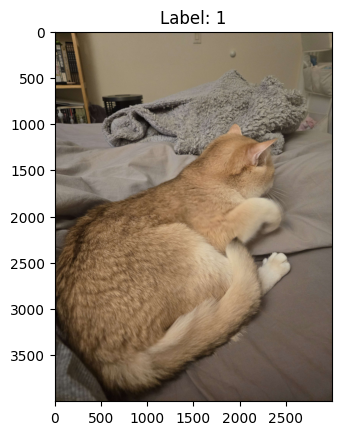

In [8]:
# Datasets using my own files
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.utils.data import DataLoader
# Ensure the correct working directory
print('Directory is: ', os.getcwd())
path = r"C:\Users\johna\Downloads\research"
print('Path is: ', path)

annotations_file = os.path.join(path, 'annotations.csv')
print("Annotation file: ", annotations_file)
img_dir = os.path.join(path, 'toast_imgs')
print("Image directory: ", img_dir)

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path).float() / 255.0  # Ensure the image is in the range [0, 1]
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Define transformation
transform = Compose([
    Normalize((0.5,), (0.5,))  # Normalizes the image
])

# Initialize datasets
training_data = CustomImageDataset(
    annotations_file=annotations_file,
    img_dir=img_dir,
    transform=transform
)

test_data = CustomImageDataset(
    annotations_file=annotations_file,
    img_dir=img_dir,
    transform=transform
)

# Initialize dataloaders
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Function to show an image
def show_image(img, label):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Change dimensions from (C, H, W) to (H, W, C)
    plt.title(f'Label: {label}')
    plt.show()

# Iterate through DataLoader
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Display the first image in the batch
img = train_features[0]
label = train_labels[0]
show_image(img, label)


In [9]:
# Transforms

# Transforms may be required to make our data usable for training.

# ToTensor()
# Converts PIL image or NumPy array to FloatTensor

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# Lambda transforms
# Applies user-defined lambda function

target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [2]:
# ---Building neural networks---

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Get device for training
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [3]:
# Define class

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Instantiate NeuralNetwork, move to device, and print structure
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [4]:
# Pass input data
# Perform forward feed to obtain prediction

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2])


In [11]:
# ---Layers---

# Pass sample input
input_image = torch.rand(3,28,28)
print("\nPass sample input: \n", input_image.size())

# Initialize nn.Flatten layer to convert 28x28 image to 784 pixel values
flatten = nn.Flatten()
flat_image = flatten(input_image)
print("\nFlatten layer: \n", flat_image.size())

# nn.Linear layer applies linear transformation on input using stored weights and biases
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print("\nLinear layer: \n", hidden1.size())

# nn.ReLU layer introduces nonlinearity to model (activation function)
print(f"\nBefore ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"\nAfter ReLU: {hidden1}\n\n")

# nn.Sequential is an ordered container of modules
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

# nn.Softmax layer returns logits (raw values), returns predicted probabilities by class between [0,1]
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(f"\nPrediction probabilities: {pred_probab}\n")


Pass sample input: 
 torch.Size([3, 28, 28])

Flatten layer: 
 torch.Size([3, 784])

Linear layer: 
 torch.Size([3, 20])

Before ReLU: tensor([[ 0.2791,  0.2001,  0.2434,  0.1463, -0.1185, -0.1198,  0.9147, -0.3084,
         -0.1615, -0.1182,  0.2375, -0.1279,  0.1394,  0.0935, -0.0333,  0.4377,
         -0.4674, -0.0772,  0.0657, -0.6274],
        [ 0.4370, -0.1376,  0.2937,  0.1158,  0.0969, -0.2416,  0.5641, -0.1187,
         -0.3499,  0.2569,  0.5299, -0.2359,  0.0833,  0.1778,  0.0126,  0.6099,
         -0.3109,  0.2134, -0.0960, -0.2490],
        [ 0.2118,  0.1950,  0.1946,  0.2370, -0.1001, -0.0339,  0.6675, -0.2621,
          0.0021, -0.1778,  0.5892, -0.1561, -0.1483,  0.3383, -0.1825,  0.7276,
         -0.1914,  0.0153, -0.4177, -0.3271]], grad_fn=<AddmmBackward0>)



After ReLU: tensor([[0.2791, 0.2001, 0.2434, 0.1463, 0.0000, 0.0000, 0.9147, 0.0000, 0.0000,
         0.0000, 0.2375, 0.0000, 0.1394, 0.0935, 0.0000, 0.4377, 0.0000, 0.0000,
         0.0657, 0.0000],
        [0

In [12]:
# Model parameters
# Print size and preview values

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0294, -0.0157,  0.0213,  ..., -0.0332,  0.0024,  0.0016],
        [-0.0152,  0.0189,  0.0228,  ..., -0.0197,  0.0342,  0.0044]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0103, -0.0194], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0199,  0.0177,  0.0098,  ..., -0.0396, -0.0099,  0.0419],
        [ 0.0085,  0.0198,  0.0340,  ...,  0.0017,  0.0425,  0.0051]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

In [3]:
# ---Automatic Differentiation (gradient descent)---

# PyTorch has a built-in differentiation engine called torch.autograd
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

# Computing gradients (of loss function)
loss.backward()
print(w.grad)
print(b.grad)

Gradient function for z = <AddBackward0 object at 0x00000279885376A0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x00000279885376A0>
tensor([[0.3209, 0.0023, 0.2498],
        [0.3209, 0.0023, 0.2498],
        [0.3209, 0.0023, 0.2498],
        [0.3209, 0.0023, 0.2498],
        [0.3209, 0.0023, 0.2498]])
tensor([0.3209, 0.0023, 0.2498])


In [6]:
# Disabling gradient tracking

# We might do this when we only want to perform forward feed and speed up computation
print("\nMethod one: \n")
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

# OR:
print("\nMethod two: \n")
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)


Method one: 

True
False

Method two: 

False


In [7]:
# ---Optimizing model parameters---

# Set up
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [8]:
# Hyperparameters

# Parameters that are changed when optimizing the model

# Define hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5


In [9]:
# Optimization loop (Training + Validation/Testing)

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

# Initialize the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
# Implement training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Implement testing loop
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# Loop over number of epochs
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done! :)")


Epoch 1
-------------------------------
loss: 0.782966  [   64/60000]
loss: 0.873729  [ 6464/60000]
loss: 0.636894  [12864/60000]
loss: 0.841128  [19264/60000]
loss: 0.734994  [25664/60000]
loss: 0.737135  [32064/60000]
loss: 0.813641  [38464/60000]
loss: 0.791890  [44864/60000]
loss: 0.793913  [51264/60000]
loss: 0.755998  [57664/60000]
Test Error: 
 Accuracy: 72.1%, Avg loss: 0.759914 

Epoch 2
-------------------------------
loss: 0.744824  [   64/60000]
loss: 0.844005  [ 6464/60000]
loss: 0.605139  [12864/60000]
loss: 0.817083  [19264/60000]
loss: 0.713716  [25664/60000]
loss: 0.711891  [32064/60000]
loss: 0.788787  [38464/60000]
loss: 0.774557  [44864/60000]
loss: 0.771579  [51264/60000]
loss: 0.734564  [57664/60000]
Test Error: 
 Accuracy: 73.3%, Avg loss: 0.737565 

Epoch 3
-------------------------------
loss: 0.711759  [   64/60000]
loss: 0.817058  [ 6464/60000]
loss: 0.577939  [12864/60000]
loss: 0.796472  [19264/60000]
loss: 0.695252  [25664/60000]
loss: 0.690809  [32064/600

In [ ]:
# Parameter Search (Hierarchial grid search)